In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("../data/customer_data.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [10]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [11]:
df.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='str')

In [12]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.cluster import KMeans

wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


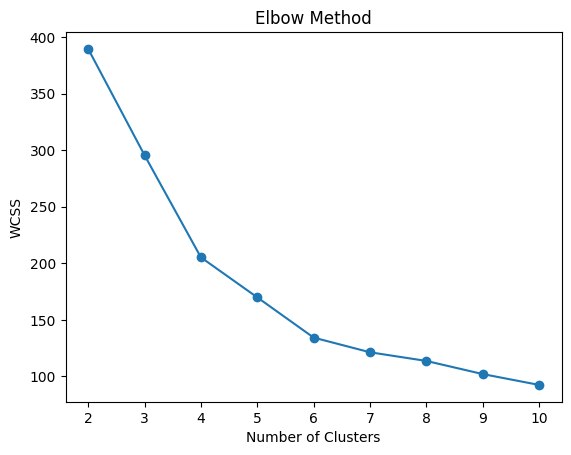

In [15]:
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


In [17]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print(score)


0.4039582785148566


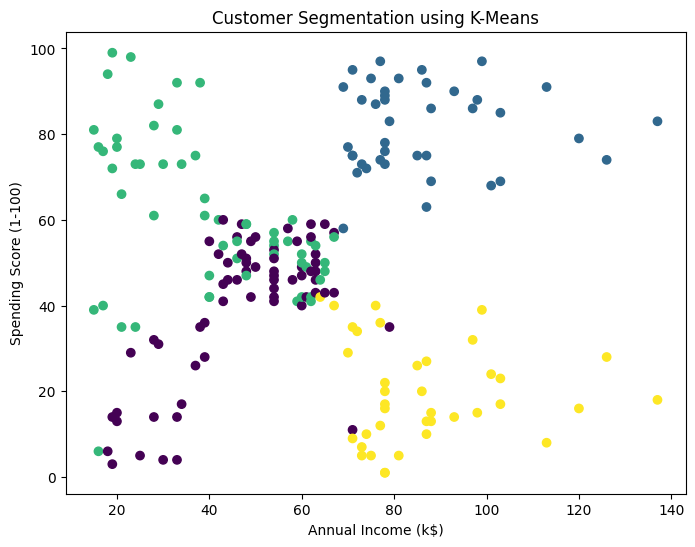

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis'
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.show()


In [20]:
df.groupby('Cluster').mean(numeric_only=True)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,69.415385,53.984615,47.707692,39.969231
1,161.025000,32.875000,86.100000,81.525000
2,53.438596,25.438596,40.000000,60.298246
3,160.552632,39.368421,86.500000,19.578947


In [21]:
from sklearn.cluster import DBSCAN


In [22]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_labels


In [23]:
df['DBSCAN_Cluster'].value_counts()


DBSCAN_Cluster
-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: count, dtype: int64

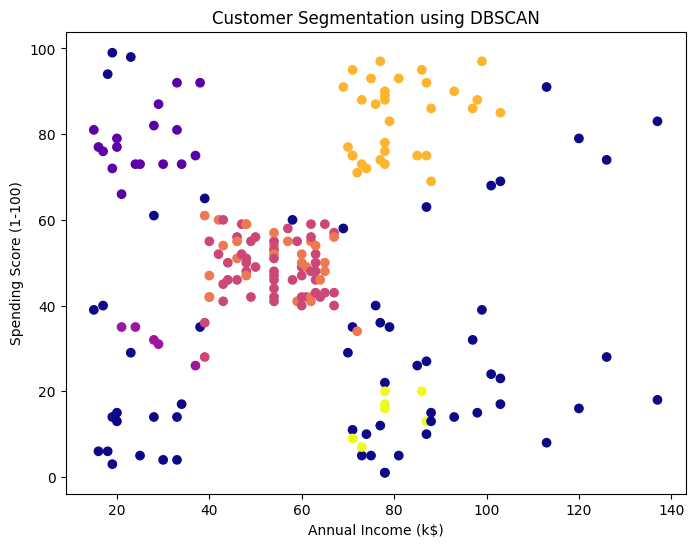

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['DBSCAN_Cluster'],
    cmap='plasma'
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using DBSCAN")
plt.show()


In [25]:
from sklearn.metrics import silhouette_score

labels = df['DBSCAN_Cluster']

# remove noise points
mask = labels != -1

silhouette = silhouette_score(X_scaled[mask], labels[mask])
print(silhouette)


0.481714917862304
